#Introduction#
The provided code is a complete example of training a convolutional neural network (CNN) and a convolutional neural network (CNN) using the VGG16 architecture on the Fashion MNIST dataset of images. It includes the next sections:
1.	Loading, checking the size of the MNIST dataset. Data preprocessing.
•	Import Necessary Libraries
•	Preprocess the Image Data

2.	Building, training and visualisation of convolutional neural networks
•	Verify Image Shapes
•	Define the Model
•	Compile the Model
•	Fit the Model
•	Display the classification report
•	Vizualization results

3.	Convolutional network using VGG16 as a convolutional base
•	Verify Image Shapes
•	Create Data Generators
•	Load VGG16 Model
•	Define the Model
•	Compile the Model
•	Fit the Model
•	Display the classification report
•	Vizualization results

4.	Making predictions


# Loading, checking the size of the MNIST dataset. Data preprocessing.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from keras import layers
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Download Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Check data shape
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


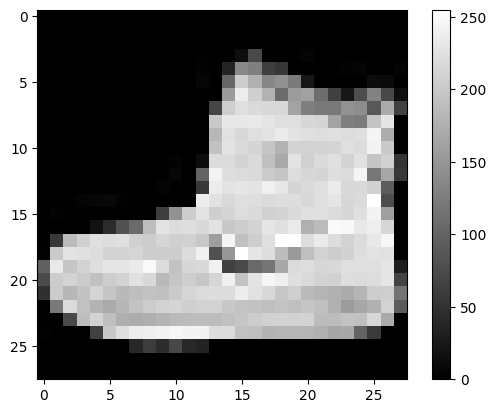

In [3]:
# Visualisation of the first image from the training dataset
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Normalising pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Reshape images to match the input Conv2D format
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
# Separate the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [7]:
# Convert labels to one-hot encoding format
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [8]:
# Check data forms after conversion
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (48000, 10)
Validation labels shape: (12000, 10)
Test labels shape: (10000, 10)


# Building, training and visualisation of convolutional neural networks

In [9]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout
    tf.keras.layers.BatchNormalization(),  # Додаємо BatchNormalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Model compilation
model_conv.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model_conv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,810 (237.54 KB)

 Trainable params: 60,682 (237.04 KB)

 Non-trainable params: 128 (512.00 B)

In [12]:
history_conv = model_conv.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7011 - loss: 0.8345 - val_accuracy: 0.7977 - val_loss: 0.5359
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8390 - loss: 0.4375 - val_accuracy: 0.8497 - val_loss: 0.4221
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8627 - loss: 0.3757 - val_accuracy: 0.8874 - val_loss: 0.3088
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8727 - loss: 0.3499 - val_accuracy: 0.8869 - val_loss: 0.3032
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8818 - loss: 0.3194 - val_accuracy: 0.8900 - val_loss: 0.3002
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8817 - loss: 0.3202 - val_accuracy: 0.9023 - val_loss: 0.2727
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8899 - loss: 0.2987 - val_accuracy: 0.9022 - val_loss: 0.2675
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8950 - loss: 0.2810 

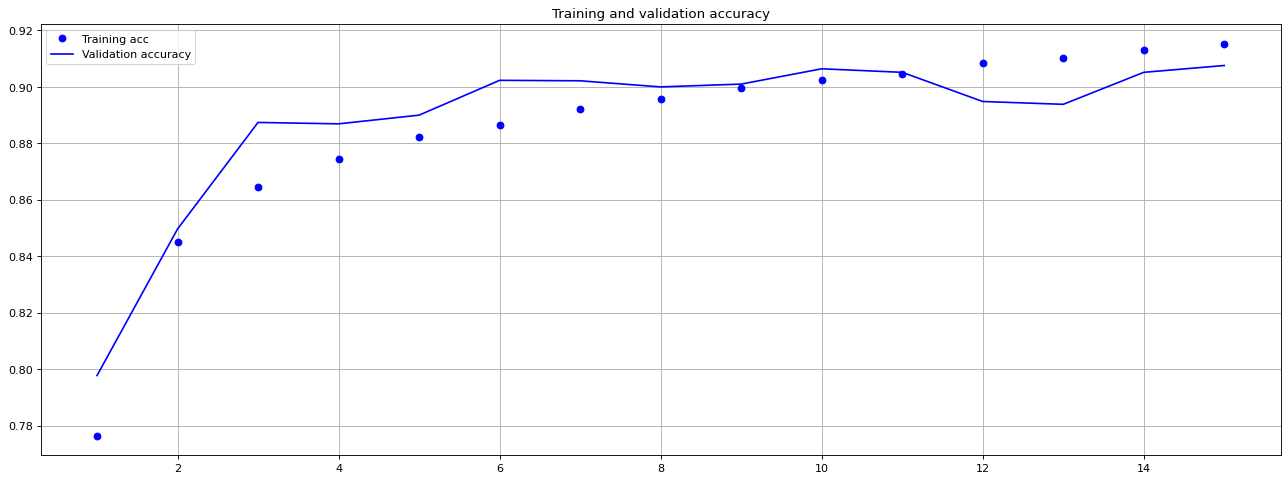

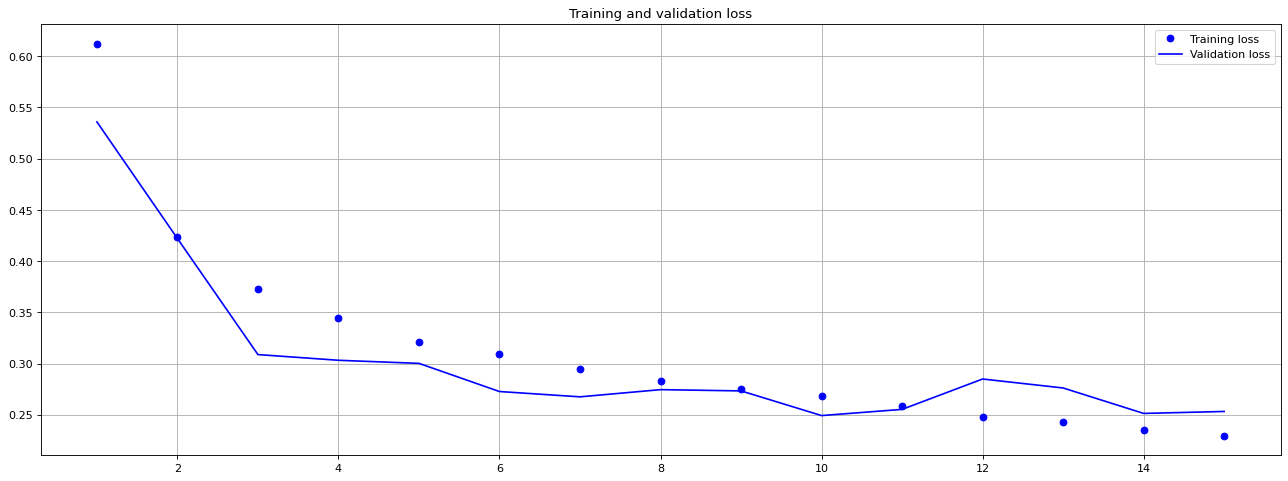

In [13]:
import matplotlib.pyplot as plt

acc = history_conv.history["accuracy"]
val_acc = history_conv.history["val_accuracy"]

loss = history_conv.history["loss"]
val_loss = history_conv.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()


*Saving the model and its training history. Downloading.*



In [14]:
# Saving the model
model_conv.save("fashion_mnist_model_conv.h5")

In [15]:
import pickle
# saving the model history
with open('fashion_mnist_model_conv_history.pkl', 'wb') as f:
    pickle.dump(history_conv.history, f)

In [16]:
# Downloading the model and its history (as a dictionary)
from tensorflow.keras.models import load_model

model_conv_loaded = load_model("fashion_mnist_model_conv.h5")
model_conv_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,812 (237.55 KB)

 Trainable params: 60,682 (237.04 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
with open('fashion_mnist_model_conv_history.pkl', 'rb') as file:
    history_loaded = pickle.load(file)

print(history_loaded)

{'accuracy': [0.776479184627533, 0.8451250195503235, 0.8645833134651184, 0.8743125200271606, 0.8822916746139526, 0.8866666555404663, 0.8921666741371155, 0.8957499861717224, 0.8995624780654907, 0.9022916555404663, 0.9046041369438171, 0.9084166884422302, 0.9103541374206543, 0.9129375219345093, 0.9153333306312561], 'loss': [0.6123142242431641, 0.4236590266227722, 0.37304943799972534, 0.34488606452941895, 0.3206997513771057, 0.30905288457870483, 0.29432880878448486, 0.2829725444316864, 0.2756009101867676, 0.26809728145599365, 0.2585630416870117, 0.2478843778371811, 0.24291138350963593, 0.23465751111507416, 0.22965525090694427], 'val_accuracy': [0.7977499961853027, 0.8496666550636292, 0.887416660785675, 0.8869166374206543, 0.8899999856948853, 0.9023333191871643, 0.9021666646003723, 0.8999999761581421, 0.9010000228881836, 0.906416654586792, 0.9051666855812073, 0.8948333263397217, 0.893833339214325, 0.9051666855812073, 0.9075833559036255], 'val_loss': [0.535932719707489, 0.4220913350582123, 0

# Convolutional network using VGG16 as a convolutional base


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

In [19]:
# Download Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
# Перевірка форми даних
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [21]:
# Change the dimension of images to 32x32
train_images = tf.image.resize(train_images[..., tf.newaxis], [32, 32])
test_images = tf.image.resize(test_images[..., tf.newaxis], [32, 32])

In [22]:
# Increase the number of channels in images from 1 to 3
if train_images.shape[-1] == 1:
    train_images = tf.repeat(train_images, 3, axis=-1)
    test_images = tf.repeat(test_images, 3, axis=-1)

In [23]:
# Normalise pixel values to a range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (60000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [24]:
# Creating a data generator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()

# Create data generators from numpy arrays
train_generator = train_datagen.flow(train_images.numpy(), train_labels, batch_size=64)
validation_generator = validation_datagen.flow(test_images.numpy(), test_labels, batch_size=64)


In [25]:
# Load VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [26]:
# Model definition
model_vgg = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

In [27]:
# Model compilation
model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
# Model training
history_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=100, # Зменшення кількості епох для швидшого тестування
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.2954 - loss: 2.0495 - val_accuracy: 0.6119 - val_loss: 1.3818
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5967 - loss: 1.3387 - val_accuracy: 0.6606 - val_loss: 1.0756
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6479 - loss: 1.0574 - val_accuracy: 0.6728 - val_loss: 0.9286
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7023 - loss: 0.9067

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 525ms/step - accuracy: 0.7021 - loss: 0.9058 - val_accuracy: 0.7300 - val_loss: 0.8076
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6844 - loss: 0.8794 - val_accuracy: 0.7056 - val_loss: 0.8148
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7268 - loss: 0.7981 - val_accuracy: 0.7300 - val_loss: 0.7742
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7287 - loss: 0.7677 - val_accuracy: 0.7541 - val_loss: 0.7270
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7233 - loss: 0.7852 - val_accuracy: 0.7900 - val_loss: 0.6389
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7131 - loss: 0.7708 - val_accuracy: 0.7150 - val_loss: 0.7719
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7122 - loss: 0.8183 - val_accuracy: 0.7606 - val_loss: 0.6806
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7341 - loss: 0.7723 - val_accuracy: 0.7256 - va

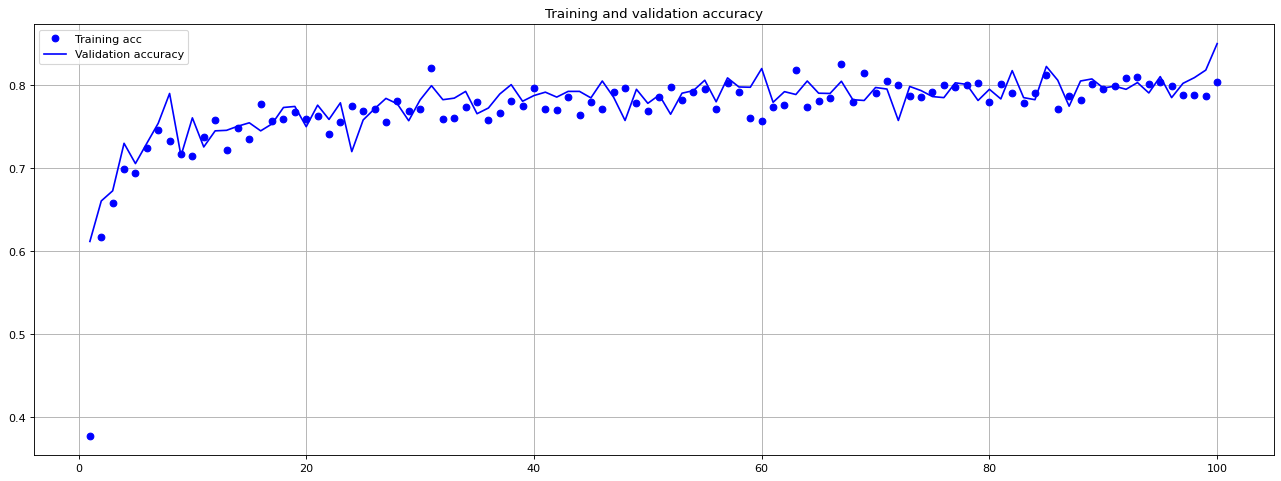

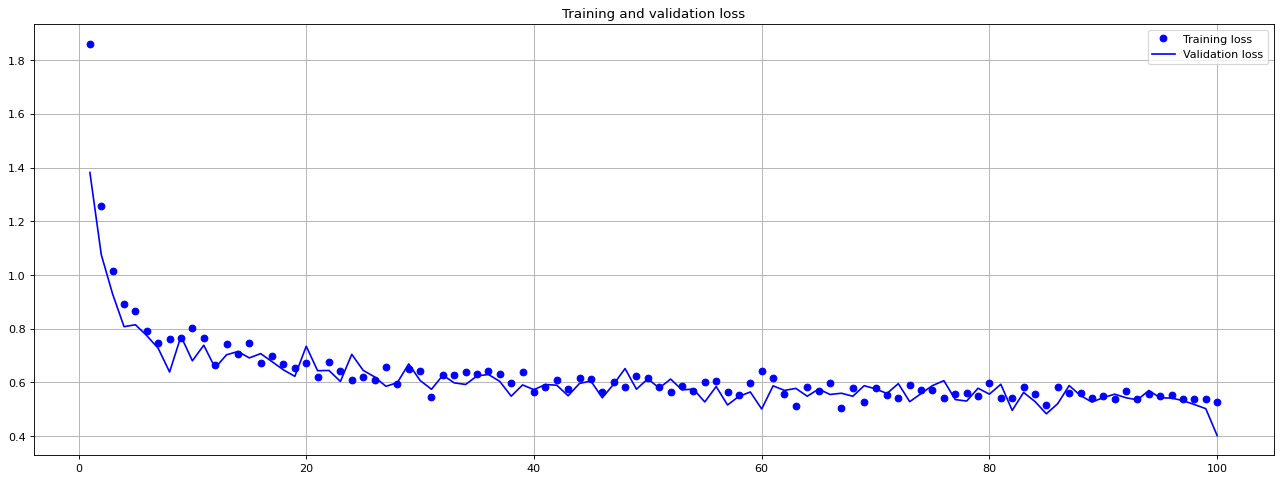

In [30]:
import matplotlib.pyplot as plt

acc = history_vgg.history["accuracy"]
val_acc = history_vgg.history["val_accuracy"]

loss = history_vgg.history["loss"]
val_loss = history_vgg.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()


In [31]:
from sklearn.metrics import classification_report
import numpy as np

# Getting predictions from test data

predictions = model_vgg.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Generation classification report
report = classification_report(test_labels, predicted_classes)
print(report)

# Check accuracy on test data using a generator

test_loss, test_acc = model_vgg.evaluate(validation_generator, steps=len(test_images) // 64, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1000
           1       0.98      0.95      0.96      1000
           2       0.69      0.75      0.72      1000
           3       0.87      0.70      0.78      1000
           4       0.63      0.76      0.69      1000
           5       0.93      0.93      0.93      1000
           6       0.52      0.55      0.54      1000
           7       0.92      0.91      0.91      1000
           8       0.93      0.96      0.94      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.82     10000
weighted avg       0.82      0.81      0.82     10000

156/156 - 1s - 9ms/step - accuracy: 0.8138 - loss: 0.5229
Test accuracy: 0.8138020634651184


*Saving model and its history. Downloading.*

In [37]:
# Saving the model
model_vgg.save("fashion_mnist_model_VGG16.h5")

In [38]:
import pickle
# saving the model history
with open('fashion_mnist_model_VGG16_history.pkl', 'wb') as f:
    pickle.dump(history_conv.history, f)

In [43]:
# Downloading the model and its history (as a dictionary)
from tensorflow.keras.models import load_model

model_vgg_loaded = load_model("fashion_mnist_model_VGG16.h5")


In [41]:
with open('fashion_mnist_model_VGG16_history.pkl', 'rb') as file:
    history_vgg_loaded = pickle.load(file)

print(history_vgg_loaded)

{'accuracy': [0.776479184627533, 0.8451250195503235, 0.8645833134651184, 0.8743125200271606, 0.8822916746139526, 0.8866666555404663, 0.8921666741371155, 0.8957499861717224, 0.8995624780654907, 0.9022916555404663, 0.9046041369438171, 0.9084166884422302, 0.9103541374206543, 0.9129375219345093, 0.9153333306312561], 'loss': [0.6123142242431641, 0.4236590266227722, 0.37304943799972534, 0.34488606452941895, 0.3206997513771057, 0.30905288457870483, 0.29432880878448486, 0.2829725444316864, 0.2756009101867676, 0.26809728145599365, 0.2585630416870117, 0.2478843778371811, 0.24291138350963593, 0.23465751111507416, 0.22965525090694427], 'val_accuracy': [0.7977499961853027, 0.8496666550636292, 0.887416660785675, 0.8869166374206543, 0.8899999856948853, 0.9023333191871643, 0.9021666646003723, 0.8999999761581421, 0.9010000228881836, 0.906416654586792, 0.9051666855812073, 0.8948333263397217, 0.893833339214325, 0.9051666855812073, 0.9075833559036255], 'val_loss': [0.535932719707489, 0.4220913350582123, 0

# Making predictions

In [58]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker',
    'Bag', 'Ankle boot'
]


# Displaying class numbers and names

for idx, class_name in enumerate(class_names):
    print(f'Номер: {idx}, Назва: {class_name}')

Номер: 0, Назва: T-shirt/top
Номер: 1, Назва: Trouser
Номер: 2, Назва: Pullover
Номер: 3, Назва: Dress
Номер: 4, Назва: Coat
Номер: 5, Назва: Sandal
Номер: 6, Назва: Shirt
Номер: 7, Назва: Sneaker
Номер: 8, Назва: Bag
Номер: 9, Назва: Ankle boot


*Making predictions with VGG16 as convolutional base*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


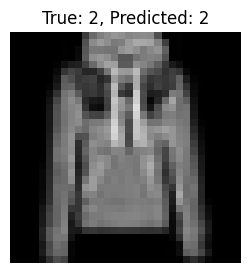

Class probabilities:
Class 0: 0.0339
Class 1: 0.0033
Class 2: 0.4791
Class 3: 0.0705
Class 4: 0.2042
Class 5: 0.0000
Class 6: 0.2085
Class 7: 0.0000
Class 8: 0.0005
Class 9: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


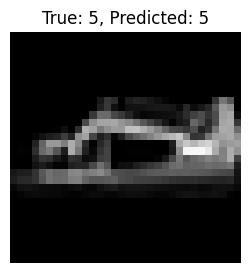

Class probabilities:
Class 0: 0.0001
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.9541
Class 6: 0.0000
Class 7: 0.0440
Class 8: 0.0010
Class 9: 0.0008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


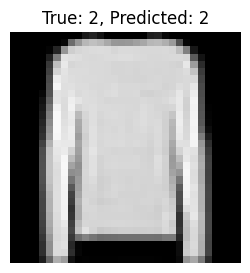

Class probabilities:
Class 0: 0.0002
Class 1: 0.0000
Class 2: 0.9872
Class 3: 0.0000
Class 4: 0.0055
Class 5: 0.0000
Class 6: 0.0067
Class 7: 0.0000
Class 8: 0.0004
Class 9: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


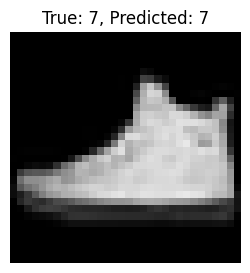

Class probabilities:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0012
Class 6: 0.0000
Class 7: 0.6235
Class 8: 0.0002
Class 9: 0.3752
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


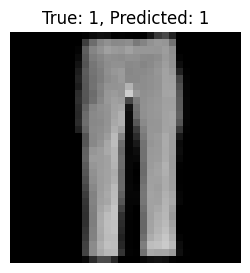

Class probabilities:
Class 0: 0.0003
Class 1: 0.9949
Class 2: 0.0012
Class 3: 0.0023
Class 4: 0.0004
Class 5: 0.0000
Class 6: 0.0007
Class 7: 0.0000
Class 8: 0.0002
Class 9: 0.0000


In [60]:
num_images = 5
indices = np.random.choice(len(test_images), num_images, replace=False)

for idx in indices:
    image = test_images[idx]
    true_label = test_labels[idx]

    # Make predictions
    y_pred_prob = model_vgg.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(y_pred_prob)

    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.show()

    print('Class probabilities:')
    for class_idx, prob in enumerate(y_pred_prob[0]):
        print(f'Class {class_idx}: {prob:.4f}')

#Summary#
This code effectively prepares image data for training a CNN and a CNN based on the VGG16 architecture, performs data augmentation to enhance model performance, and sets up the model for training on a dataset with potentially multiple classes. It demonstrates an essential workflow in deep learning for image classification tasks.